In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use('../enerdata.mplstyle')


In [2]:
azulier        = "#1A3D6F"
doradoier     = '#C65C25'

In [3]:
f = '../../data/temixco.csv'
tmx = pd.read_csv(f,index_col=0,parse_dates=True)
tmx

,Ib,Ig,To,RH,WS,WD,P
time,,,,,,,
2018-01-01 00:00:00,NaN,NaN,18.70,36.34,1.422,316.0,87864.11
2018-01-01 00:10:00,0.002,0.0,18.95,35.29,1.008,283.7,87876.37
2018-01-01 00:20:00,0.170,0.0,18.94,35.43,1.565,326.0,87888.64
2018-01-01 00:30:00,0.371,0.0,18.77,35.89,2.175,354.5,87887.21
2018-01-01 00:40:00,0.305,0.0,18.81,36.34,1.902,348.0,87886.91
...,...,...,...,...,...,...,...
2018-12-31 23:10:00,0.125,0.0,18.51,47.29,1.715,332.2,87484.32
2018-12-31 23:20:00,0.000,0.0,18.26,48.02,1.703,320.5,87470.70
2018-12-31 23:30:00,0.044,0.0,18.39,46.84,2.887,335.7,87455.03


In [4]:
dia = tmx[['Ig','To']].groupby(by=[tmx.index.strftime("%H:%M")]).mean()
dia.index = pd.to_datetime(dia.index,format="%H:%M")
dia

,Ig,To
time,,
1900-01-01 00:00:00,0.026025,20.839616
1900-01-01 00:10:00,0.018645,20.763068
1900-01-01 00:20:00,0.017623,20.666082
1900-01-01 00:30:00,0.009722,20.600986
1900-01-01 00:40:00,0.009344,20.525014
...,...,...
1900-01-01 23:10:00,0.060608,21.360192
1900-01-01 23:20:00,0.031022,21.280055
1900-01-01 23:30:00,0.022805,21.190795


In [5]:
dia.index

DatetimeIndex(['1900-01-01 00:00:00', '1900-01-01 00:10:00',
               '1900-01-01 00:20:00', '1900-01-01 00:30:00',
               '1900-01-01 00:40:00', '1900-01-01 00:50:00',
               '1900-01-01 01:00:00', '1900-01-01 01:10:00',
               '1900-01-01 01:20:00', '1900-01-01 01:30:00',
               ...
               '1900-01-01 22:20:00', '1900-01-01 22:30:00',
               '1900-01-01 22:40:00', '1900-01-01 22:50:00',
               '1900-01-01 23:00:00', '1900-01-01 23:10:00',
               '1900-01-01 23:20:00', '1900-01-01 23:30:00',
               '1900-01-01 23:40:00', '1900-01-01 23:50:00'],
              dtype='datetime64[ns]', name='time', length=144, freq=None)

<AxesSubplot: xlabel='time'>

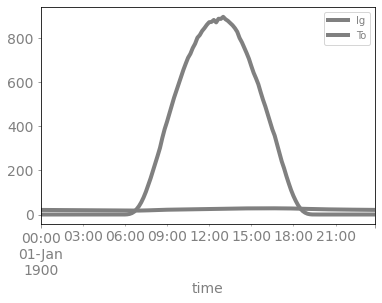

In [6]:

plt.style.use('../enerdata.mplstyle')

dia.plot()

In [7]:
# def formato_ax(axs):
#     for ax in axs:
# #         ax.legend()
#         ax.spines[['right', 'top']].set_visible(False)
# #         ax.grid()
# #         ax.spines['bottom'].set_color('grey')
# #         ax.spines['left'].set_color('grey')    
#         ax.tick_params(axis='both', colors='grey')


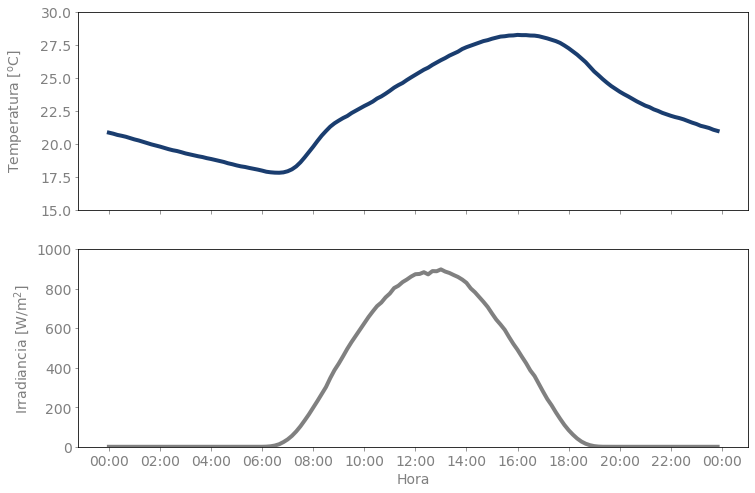

In [11]:


fig, ax = plt.subplots(2,sharex=True,figsize=(12,8))


ax[0].plot(dia.To,c=azulier)
ax[1].plot(dia.Ig)

ax[0].set_ylim(15,30)
ax[1].set_ylim(0,1000)


ax[0].set_ylabel('Temperatura [$^oC$]'  , labelpad=14)
ax[1].set_ylabel('Irradiancia [$W/m^2$]',)
ax[1].set_xlabel('Hora')

ax[1].xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"));

# formato_ax(ax);